In [2]:
%matplotlib inline
import os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None 

## Step 1: Loading the data, including testing/training split from Project 1
Loading ecommerce data from kaggle (https://www.kaggle.com/prachi13/customer-analytics)

Exploring the dataset, addressing any missing data issues and scaling.

In [3]:
folder = "https://raw.githubusercontent.com/beyenidogan/AdvData/main/Project3/"
file_name="ecommerce_shipping.csv"
file_url=folder+file_name

shipping = pd.read_csv(file_url,error_bad_lines=False)


In [4]:
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
shipping.shape

(10999, 12)

In [6]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  ReachedonTime_YN     10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,ReachedonTime_YN
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
shipping['Product_importance_S'] = shipping['Product_importance'].replace(['low','medium','high'],[1,2,3])
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,2


In [9]:
shipping = shipping.drop('Product_importance', axis=1)
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,F,44,1233,1,1
1,2,F,Flight,4,5,216,2,M,59,3088,1,1
2,3,A,Flight,2,2,183,4,M,48,3374,1,1
3,4,B,Flight,3,3,176,4,M,10,1177,1,2
4,5,C,Flight,2,2,184,3,F,46,2484,1,2


In [10]:
shipping.shape

(10999, 12)

In [11]:
y = shipping["ReachedonTime_YN"]
y.value_counts()

1    6563
0    4436
Name: ReachedonTime_YN, dtype: int64

In [12]:
X = shipping.drop("ReachedonTime_YN", axis=1)
X.shape

(10999, 11)

In [13]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=0)

### Handling categorical variables with one hot encoding

In [14]:
import pandas as pd

In [15]:
X_train_encoded = pd.get_dummies(X_train)
display(X_train_encoded.head())

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_S,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
532,533,4,3,192,3,43,3498,1,0,0,1,0,0,0,1,0,1,0
6655,6656,4,5,272,2,1,5378,2,0,0,0,0,1,0,0,1,1,0
1513,1514,3,5,130,5,27,1891,1,0,0,0,0,1,1,0,0,1,0
3421,3422,4,5,159,2,1,5671,1,0,0,0,0,1,1,0,0,0,1
7033,7034,4,3,196,2,10,5709,3,0,0,0,0,1,0,0,1,0,1


In [16]:
print("Original features:\n", list(X_train.columns), "\n")

print("Features after get_dummies:\n", list(X_train_encoded.columns))

Original features:
 ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Product_importance_S'] 

Features after get_dummies:
 ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Product_importance_S', 'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Gender_F', 'Gender_M']


In [17]:
X_test_encoded = pd.get_dummies(X_test)
display(X_test_encoded.head())

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_S,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
1342,1343,4,4,216,2,6,3255,2,0,0,1,0,0,0,0,1,1,0
2951,2952,4,2,165,3,7,1702,1,0,0,0,0,1,0,0,1,0,1
381,382,5,2,199,4,59,2885,1,0,1,0,0,0,0,0,1,1,0
9703,9704,7,3,274,5,9,1764,1,0,0,0,0,1,0,1,0,1,0
9656,9657,7,2,301,4,1,1339,1,1,0,0,0,0,0,0,1,0,1


## Step 2: PCA for Feature Selection

### 2.1 Run PCA on unscaled data

### 2.1.1 PCA for 95% variance on data as is

Text(0, 0.5, 'Second principal component')

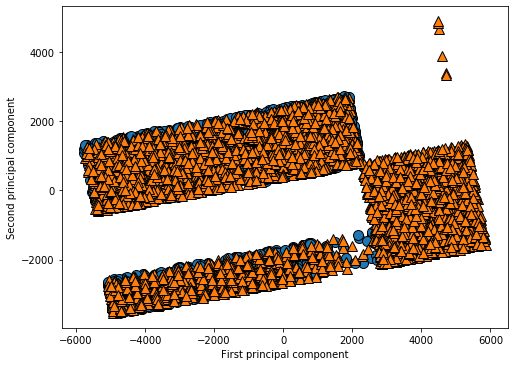

In [18]:
from sklearn.decomposition import PCA
import mglearn
# keep the first two principal components of the data
#pca1 = PCA(n_components=2)
pca1 = PCA(n_components=0.95)
# fit PCA model to data
pca1.fit(X_train_encoded)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_train_encoded)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train)
#plt.legend(X_train.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

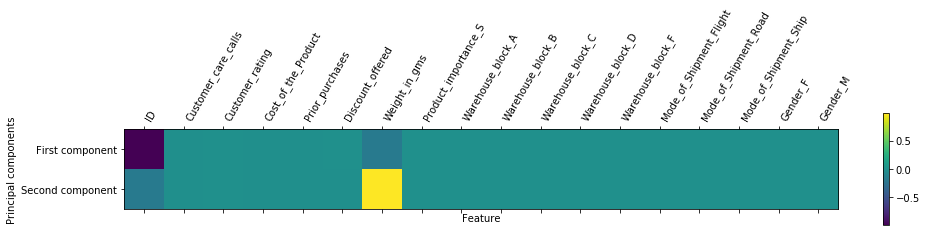

In [19]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train_encoded.columns)),
           X_train_encoded.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 2.2 Run PCA on scaled data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_encoded)
X_scaled = scaler.transform(X_train_encoded)

In [21]:
X_scaled.shape

(8799, 18)

###  2.2.1 PCA for 95% variance on scaled data

Text(0, 0.5, 'Second principal component')

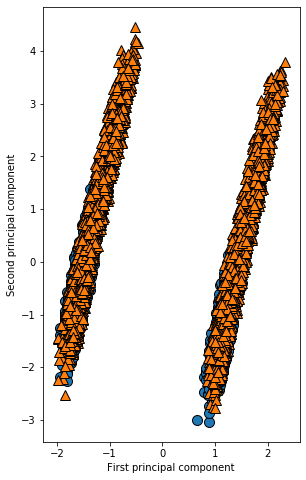

In [22]:
# keep the first two principal components of the data
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)
#plt.legend(y_train.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

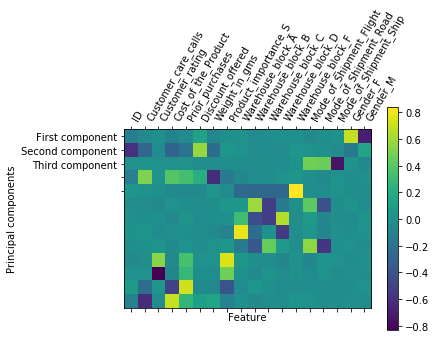

In [23]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0,1,2,3,4], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(X_train_encoded.columns)),
           X_train_encoded.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [24]:
# keep all the principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)
X_pca3 = pca3.transform(X_scaled)
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[1.11425830e-01 1.07564794e-01 1.00455138e-01 9.02480619e-02
 7.79495718e-02 6.72683500e-02 6.66318139e-02 6.65265256e-02
 6.57119474e-02 5.71461357e-02 5.48218353e-02 4.88639050e-02
 3.73683712e-02 2.65052768e-02 2.15124433e-02 9.33283967e-33
 7.80508279e-33 4.04885920e-33]


In [25]:
# keep the components of the data explainin 95% of the variance
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
X_pca4 = pca4.transform(X_scaled)
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.11142583 0.10756479 0.10045514 0.09024806 0.07794957 0.06726835
 0.06663181 0.06652653 0.06571195 0.05714614 0.05482184 0.04886391
 0.03736837]


### 2.3 Run the best performing model of RandomForest Classifier from Project2

Scaling and running PCA on the test data

In [26]:
scaler2 = StandardScaler()
scaler2.fit(X_train_encoded)
X_test_scaled = scaler2.transform(X_test_encoded)

# keep the first two principal components of the data
pca5 = PCA(n_components=0.95)
# fit PCA model to data
pca5.fit(X_test_scaled)

# transform data onto the first two principal components
X_pca_test = pca5.transform(X_test_scaled)


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2)

rfc.fit(X_pca2, y_train)

print("Randomforest Accuracy on training set: {:.2f}".format(rfc.score(X_pca2, y_train)))
print("Randomforest Accuracy on test set: {:.2f}".format(rfc.score(X_pca_test, y_test)))

Randomforest Accuracy on training set: 0.83
Randomforest Accuracy on test set: 0.61


## Step 3: Apply 3-types of clustering on the data and visualize the output of each both with and without PCA run on it first. 

Calculate both ARI and Silhouette Coefficient for all six of the combinations.

### 3.1.1 k-means clustering without PCA

Text(0, 0.5, 'Feature 1')

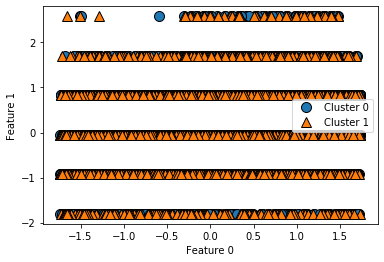

In [28]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

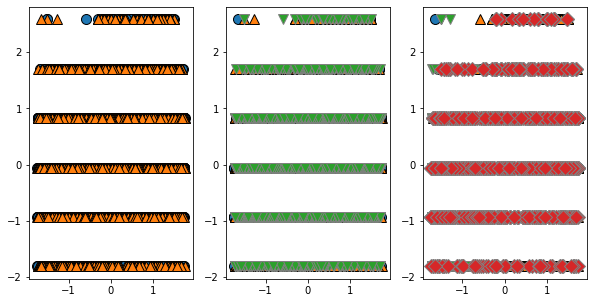

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1],assignments, ax=axes[2])

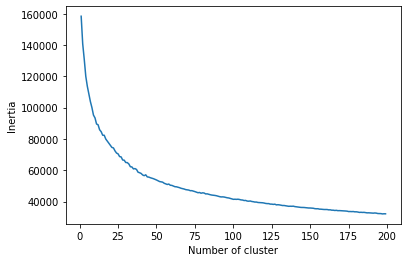

In [30]:
inertiaVals = {}

for k in range(1, 200):
    kmeansTmp = KMeans(n_clusters=k, max_iter=5000).fit(X_scaled)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

Though it is difficult to identify a definitive number of clusters from the elbow curve, it seems that beyond k=50 adding additional cluster contributes to less marginal improvement in the model. So the optimal number of clusters are around 50.

### 3.1.2. k-means clustering with PCA

Text(0, 0.5, 'Feature 1')

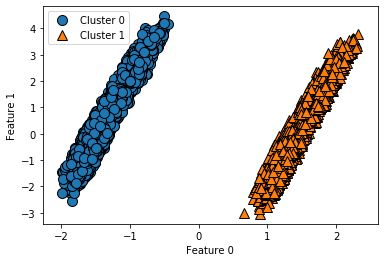

In [31]:
# build the clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

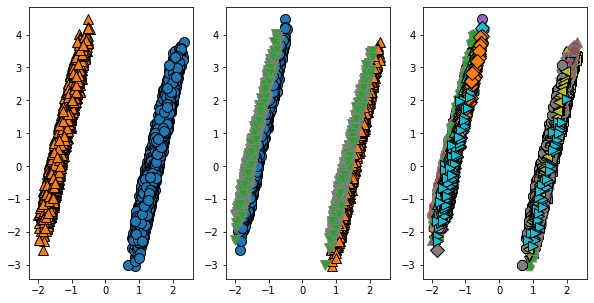

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca2)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca2)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=60)
kmeans.fit(X_pca2)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignments, ax=axes[2])

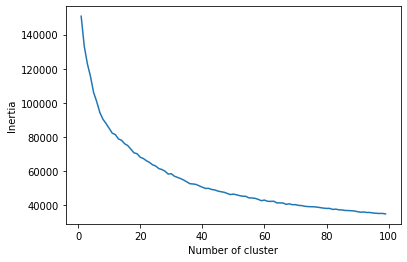

In [33]:
inertiaVals = {}

for k in range(1, 100):
    kmeansTmp = KMeans(n_clusters=k, max_iter=5000).fit(X_pca2)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

With PCA, it seems that beyond k=30 adding additional cluster contributes to less marginal improvement in the model. So the optimal number of clusters are around 30.

### 3.2.1. Agglomerative Clustering without PCA

Text(0, 0.5, 'Feature 1')

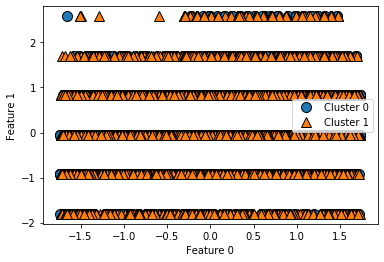

In [39]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X_scaled)

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

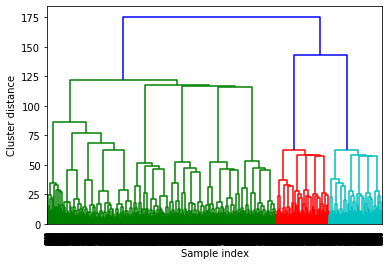

In [41]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_scaled)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
ax = plt.gca()

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### 3.2.2. Agglomerative Clustering with PCA

Text(0, 0.5, 'Feature 1')

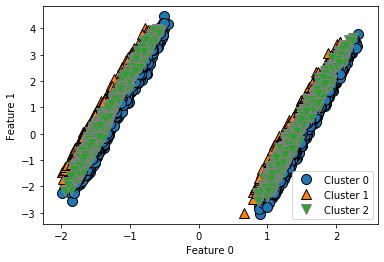

In [44]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_pca2)

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

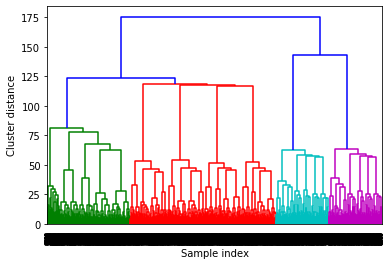

In [42]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_pca2)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### 3.3.1. DBSCAN without PCA

Text(0, 0.5, 'Feature 1')

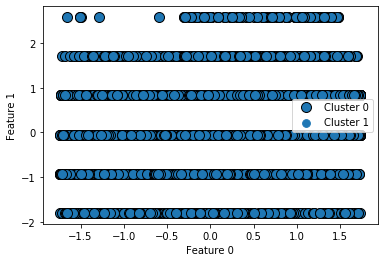

In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 3.3.2. DBSCAN with PCA

Text(0, 0.5, 'Feature 1')

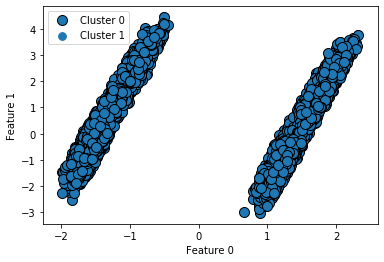

In [46]:
dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_pca2)

# plot the cluster assignments
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 3.4. Comparing clustering algorithms with ground truth

### 3.4.1. Comparing clustering algorithms with ground truth without PCA

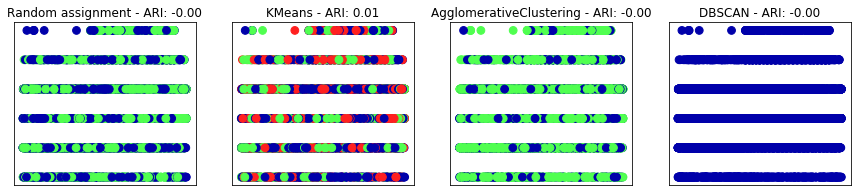

In [47]:
from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=50), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_scaled))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

### 3.4.2. Comparing clustering algorithms with ground truth with PCA

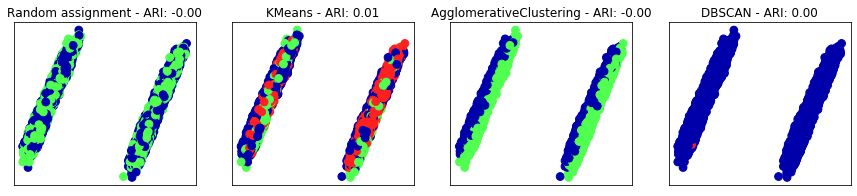

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=30), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca2))

# plot random assignment
axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_pca2)
    ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

### 3.5. Comparing clustering algorithms without ground truth

### 3.5.1. Comparing clustering algorithms without ground truth without PCA

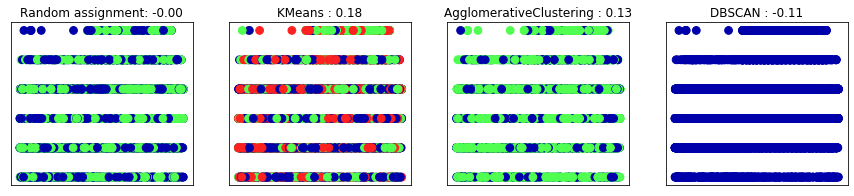

In [49]:
from sklearn.metrics.cluster import silhouette_score

# rescale the data to zero mean and unit variance
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=50), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

### 3.5.2. Comparing clustering algorithms without ground truth with PCA

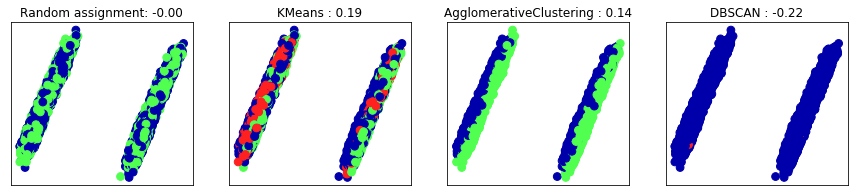

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_pca2))

# plot random assignment
axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_pca2, random_clusters)))

algorithms = [KMeans(n_clusters=30), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_pca2)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_pca2, clusters)))